# Домашнее задание 3. Свёрточные и рекуррентные нейронные сети
## Фамилия Имя Группа

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача генерации</th>
            <th colspan=5>Задача классификации</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th style="background-color:red; color:white">C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td style="background-color:red; color:white">L</td>
            <td>6</td>
            <td>7</td>
            <td style="background-color:red; color:white">8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача классификации картинок**

A. [Набор данных "Fashion MNIST"](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) `torchvision.datasets.FashionMNIST train=True и False`

B. [Набор данных "Текстуры"](https://pytorch.org/vision/main/generated/torchvision.datasets.DTD.html#torchvision.datasets.DTD) `torchvision.datasets.DTD split='train' и 'test'`

C. **[Набор данных "Буквы"](https://pytorch.org/vision/main/generated/torchvision.datasets.EMNIST.html#torchvision.datasets.EMNIST)** `torchvision.datasets.EMNIST split=letters train=True и False`

D. [Набор данных "Кошки и собаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.OxfordIIITPet.html) `torchvision.datasets.OxfordIIITPet split = 'trainval' и 'test'` (объекты разбиты по породам (всего 37 пород), нужно построить бинарный классификатор собак и кошек)

E. [Набор данных "Дорожные знаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.GTSRB.html) `torchvision.datasets.GTSRB split = 'train' и 'test'`


---

**Задача генерации текстов**

K. [Набор данных "Евгений Онегин"]() `onegin.txt`

L. **[Набор данных "Война и Мир"]() `war_and_piece.txt`**

M. [Набор данных "Стихи"]() `stihi.csv`

N. [Набор данных "Сказки"]() `fairytales.txt`

O. [Набор данных "Новости"]() `news.txt` или https://github.com/yutkin/Lenta.Ru-News-Dataset/releases

# 0. Инициализация библиотек

In [33]:
import torch
import torchvision
import numpy as np
import pandas as pd
import torch.nn as nn
from torch import optim
from os.path import exists
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchsummary import summary
from torch.autograd import Variable
import matplotlib.animation as animation
import torchvision.transforms as transforms

Подсказка по разделению пород на два класса
```
import torchvision

# Все классы
len(torchvision.datasets.OxfordIIITPet(root='data_train', download=True).classes)

# кошки
cats = ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Egyptian Mau', 'Maine Coon', 'Persian', 'Ragdoll', 'Russian Blue', 'Siamese', 'Sphynx']

# собаки
dogs = ['American Bulldog', 'American Pit Bull Terrier', 'Basset Hound', 'Beagle', 'Boxer', 'Chihuahua', 'English Cocker Spaniel', 'English Setter', 'German Shorthaired', 'Great Pyrenees',
        'Havanese', 'Japanese Chin', 'Keeshond', 'Leonberger', 'Miniature Pinscher', 'Newfoundland', 'Pomeranian', 'Pug', 'Saint Bernard', 'Samoyed', 'Scottish Terrier', 'Shiba Inu',
        'Staffordshire Bull Terrier', 'Wheaten Terrier', 'Yorkshire Terrier']
```

# 1. Свёрточная нейронная сеть для классификации изображений (9 баллов)

## 1.1 Загрузка данных, разделение на train и test

Загрузите данные при помощи torchvision.datasets. Можете предусмотреть опредлённые транфсофрмации картинки, например, изменение размера до 128 px, кроп по центру в 196 px и преобразование к классу torch.Tensor:

```
import torchvision


transform = torchvision.transforms.Compose([
    # resize
    torchvision.transforms.Resize(128),
    torchvision.transforms.CenterCrop(196),
    torchvision.transforms.ToTensor()
])
```

In [87]:
transform = transforms.Compose([
	transforms.Resize(24),
	transforms.CenterCrop(32),
	transforms.ToTensor()
])

In [88]:
data_train = torchvision.datasets.EMNIST(
	root = './data/sets/letters/', 
	split = "letters", 
	train = True, 
	download = True,
	transform = transform
)

data_test = torchvision.datasets.EMNIST(
	root = './data/sets/letters/', 
	split = "letters", 
	train = False, 
	download = True,
	transform = transform
)

In [89]:
nbatch = 16
trainset = torch.utils.data.DataLoader(
	data_train, 
	batch_size = nbatch, 
	shuffle = True,
	num_workers=2
)
testset = torch.utils.data.DataLoader(
	data_test, 
	batch_size = nbatch, 
	shuffle = False,
	num_workers=2
) 

n n l g d f e d v k p d h f f h


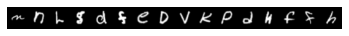

In [90]:
def imshow(img):
    img = img*std + mean
    npimg = img.numpy()
    plt.axis("off")
    npimg = np.transpose(npimg,(2, 1, 0))
    plt.imshow(npimg)
    plt.show
    
dataiter = iter(trainset)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow = 1))

print(" ".join(str(data_train.classes[labels[j]]) for j in range(nbatch)))

## 1.2 Предобработка данных (по необходимости)

## 1.3 Инициализация объекта свёрточной нейронной сети

Создайте нейронную сеть с 2-4 свёрточными слоями. В остальном конфигурация сети может быть произвольной. 

In [161]:
class CNN(nn.Module):
	def __init__(self, regularization:dict = {}):
		super(CNN, self).__init__()
		self.conv1 = nn.Sequential(
			nn.Conv2d(
				in_channels = 1, 
				out_channels = 16, 
				kernel_size = 5,
				stride = 1,
				padding = 2
			),
			nn.ReLU(),
			nn.MaxPool2d(
				kernel_size = 2,
				stride = 2
			)
		)
		self.conv2 = nn.Sequential(
			nn.Conv2d(
				in_channels = 16, 
				out_channels = 32, 
				kernel_size = 3,
				stride = 1,
				padding = 2
			),
			nn.ReLU(),
			nn.MaxPool2d(
				kernel_size = 2,
				stride = 2
			)
		)
		self.conv3 = nn.Sequential(
			nn.Conv2d(
				in_channels = 32, 
				out_channels = 64, 
				kernel_size = 2,
				stride = 1,
				padding = 2
			),
			nn.ReLU(),
			nn.MaxPool2d(
				kernel_size = 2,
				stride = 2
			)
		)
		if regularization:
			self.out = nn.Sequential(
				nn.Linear(2304, 1024),
				nn.BatchNorm1d(
					1024, 
					eps = regularization['eps'], 
					momentum = regularization['momentum']
				),
				nn.Dropout(p = regularization['p']),
				nn.Linear(1024, 512),
				nn.BatchNorm1d(
					512, 
					eps = regularization['eps'], 
					momentum = regularization['momentum']
				),
				nn.Dropout(p = regularization['p']),
				nn.Linear(512, 27)
			)	
		else:
			self.out = nn.Sequential(
				nn.Linear(2304, 1024),
				nn.Linear(1024, 512),
				nn.Linear(512, 27)
			)
	
	def forward(self, x):
		x = self.conv1(x)
		x = self.conv2(x)
		x = self.conv3(x)
		# flatten the output of conv2 to (batch_size, 32 * 7 * 7)
		x = x.view(x.size(0), -1)       
		output = self.out(x)
		return output, x    # return x for visualization		
		


In [169]:
cnn = CNN()
cnn.cuda()
summary(cnn, (1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             416
              ReLU-2           [-1, 16, 32, 32]               0
         MaxPool2d-3           [-1, 16, 16, 16]               0
            Conv2d-4           [-1, 32, 18, 18]           4,640
              ReLU-5           [-1, 32, 18, 18]               0
         MaxPool2d-6             [-1, 32, 9, 9]               0
            Conv2d-7           [-1, 64, 12, 12]           8,256
              ReLU-8           [-1, 64, 12, 12]               0
         MaxPool2d-9             [-1, 64, 6, 6]               0
           Linear-10                 [-1, 1024]       2,360,320
           Linear-11                  [-1, 512]         524,800
           Linear-12                   [-1, 27]          13,851
Total params: 2,912,283
Trainable params: 2,912,283
Non-trainable params: 0
---------------------------

## 1.4 Обучение свёрточной нейронной сети для решения задачи классификации

In [172]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    cnn.parameters(),
    lr = 0.001
)

num_epochs = 100
loadAndTrain = False

In [167]:
def train(num_epochs, cnn, train_set, dumpName: str):
	
	cnn.train()
		
	# Train the model
	total_step = len(train_set)
	lossHistory = []
		
	for epoch in range(num_epochs):
		for i, (images, labels) in enumerate(train_set):
			
			# gives batch data, normalize x when iterate train_loader
			b_x = Variable(images.cuda())   # batch x
			b_y = Variable(labels.cuda())   # batch y
			output = cnn(b_x)[0]               
			loss = loss_func(output, b_y)
			
			# clear gradients for this training step   
			optimizer.zero_grad()           
			
			# backpropagation, compute gradients 
			loss.backward()                # apply gradients             
			optimizer.step()                
			
			if i==0 or (i+1) % 100 == 0:
				print ('Эпоха [{}/{}], Шаг [{}/{}], Потери: {:.4f}' 
					   .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
				lossHistory.append(loss.item())
				pass
		pass
	pass
	torch.save(cnn.state_dict(), f'./data/dumps/{dumpName}.dump')
	return lossHistory
	

In [173]:
if  not loadAndTrain and exists('./data/dumps/cnn_1.dump'):
	cnn.load_state_dict(torch.load('./data/dumps/cnn_1.dump'))
else:
	if loadAndTrain and exists('./data/dumps/cnn_1.dump'):
		cnn.load_state_dict(torch.load('./data/dumps/cnn_1.dump'))
	story = train(num_epochs, cnn, trainset, 'cnn_1')
	plt.plot(story)

Проверка точности модели на 20800 тестовых изображениях: 0.915


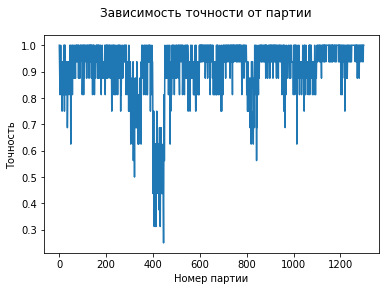

In [51]:
def test(test_set):
    # Test the model
    cnn.eval()
    __accuracy_list = []

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_set:
            test_output, last_layer = cnn(images.cuda())
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels.cuda()).sum().item() / float(labels.cuda().size(0))
            __accuracy_list.append(accuracy)
            pass
        print(f'Проверка точности модели на {len(test_set) * nbatch} тестовых изображениях: {np.average(__accuracy_list)}')
    pass
    return __accuracy_list

accuracy = test(testset)
plt.plot(accuracy)
plt.xlabel('Номер партии')
plt.ylabel('Точность')
plt.suptitle('Зависимость точности от партии')
plt.show()

## 1.5 Агументация данных и регулряизации нейросети

Попобуйте добавить аугументацию (случайные повороты, увеличение, уменьшение) в данные, а также регуляризацию (Drop out и Batch Norm слои) в модель. Как меняется метрика accuracy на обучающей и тестовой выборке в процессе обучения? Постройте график.

In [153]:
randTransform = torchvision.transforms.Compose([
    transforms.RandomPerspective(),
	transforms.RandomAffine(degrees=(-180, 180), scale=(0.5, 1)),
	transforms.RandomCrop(32, padding = 4),
	transforms.RandomVerticalFlip(),
	transforms.RandomHorizontalFlip(),
	transforms.ToTensor()
])

In [154]:
trainDataRand = torchvision.datasets.EMNIST(
	root = './data/sets/letters/', 
	split = "letters", 
	train = True, 
	download = True,
	transform = randTransform
)

testDataRand = torchvision.datasets.EMNIST(
	root = './data/sets/letters/', 
	split = "letters", 
	train = False, 
	download = True,
	transform = randTransform
)

In [155]:
nbatch = 16
trainSetRand = torch.utils.data.DataLoader(
	trainDataRand, 
	batch_size = nbatch, 
	shuffle = True,
	num_workers=2
)
testSetRand = torch.utils.data.DataLoader(
	testDataRand, 
	batch_size = nbatch, 
	shuffle = False,
	num_workers=2
)

l p p j j n m y d k v r t k v a


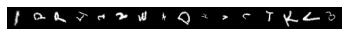

In [156]:
dataiter = iter(trainSetRand)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow = 1))

print(" ".join(str(data_train.classes[labels[j]]) for j in range(nbatch)))

In [164]:
cnnR = CNN(
	regularization={
		'eps': 0.00001,		# default 'eps': 0.00001
		'momentum': 0.1, 	# default 'momentum': 0.1
		'p': 0.5			# default 'p': 0.5
	}
)
cnnR.cuda()
summary(cnnR, (1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             416
              ReLU-2           [-1, 16, 32, 32]               0
         MaxPool2d-3           [-1, 16, 16, 16]               0
            Conv2d-4           [-1, 32, 18, 18]           4,640
              ReLU-5           [-1, 32, 18, 18]               0
         MaxPool2d-6             [-1, 32, 9, 9]               0
            Conv2d-7           [-1, 64, 12, 12]           8,256
              ReLU-8           [-1, 64, 12, 12]               0
         MaxPool2d-9             [-1, 64, 6, 6]               0
           Linear-10                 [-1, 1024]       2,360,320
      BatchNorm1d-11                 [-1, 1024]           2,048
          Dropout-12                 [-1, 1024]               0
           Linear-13                  [-1, 512]         524,800
      BatchNorm1d-14                  [

## 1.6 Обучение нейросети на данных с аугументацией 

In [174]:
if  not loadAndTrain and exists('./data/dumps/cnn_2.dump'):
	cnnR.load_state_dict(torch.load('./data/dumps/cnn_2.dump'))
else:
	if loadAndTrain and exists('./data/dumps/cnn_2.dump'):
		cnnR.load_state_dict(torch.load('./data/dumps/cnn_2.dump'))
	story = train(num_epochs, cnnR, trainSetRand, 'cnn_2')
	plt.plot(story)

Эпоха [1/100], Шаг [1/7800], Потери: 3.5489
Эпоха [1/100], Шаг [100/7800], Потери: 3.2796
Эпоха [1/100], Шаг [200/7800], Потери: 3.4900
Эпоха [1/100], Шаг [300/7800], Потери: 3.7805
Эпоха [1/100], Шаг [400/7800], Потери: 3.5999
Эпоха [1/100], Шаг [500/7800], Потери: 3.7849
Эпоха [1/100], Шаг [600/7800], Потери: 3.8963
Эпоха [1/100], Шаг [700/7800], Потери: 3.4019
Эпоха [1/100], Шаг [800/7800], Потери: 3.7632
Эпоха [1/100], Шаг [900/7800], Потери: 3.4319
Эпоха [1/100], Шаг [1000/7800], Потери: 3.4473
Эпоха [1/100], Шаг [1100/7800], Потери: 3.5556
Эпоха [1/100], Шаг [1200/7800], Потери: 3.6264
Эпоха [1/100], Шаг [1300/7800], Потери: 3.7477
Эпоха [1/100], Шаг [1400/7800], Потери: 3.6021
Эпоха [1/100], Шаг [1500/7800], Потери: 3.6646
Эпоха [1/100], Шаг [1600/7800], Потери: 3.5467
Эпоха [1/100], Шаг [1700/7800], Потери: 3.5809
Эпоха [1/100], Шаг [1800/7800], Потери: 3.6611
Эпоха [1/100], Шаг [1900/7800], Потери: 3.6076
Эпоха [1/100], Шаг [2000/7800], Потери: 3.2118
Эпоха [1/100], Шаг [2100/

## 1.7 Выводы

Что удалось попробовать? Что получилось, а что — нет? Повлияло ли добавление аугументации на качество?

# 2. Рекуррентная нейронная сеть для генерации текстов (9 баллов)

## 2.1 Загрузка данных



## 2.2 Преодбработка/нормализация данных по необходимости

Например, можно привести все слова к нижнему регистру

## 2.3 Инициализация объекта рекуррентной нейронной сети

## 2.4 Обучение обычной рекуррентной нейронной сети

## 2.5 Генерация текстов при помощи обычной рекуррентной сети

## 2.6 Обучение рекуррентной нейронной сети с LSTM-ячейками

## 2.7 Генерация текстов с разной температурой

Попробуйте сгенерировать тексты с температурой из списка: `[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]` (см. нотубук с семинара по RNN)

## 2.8 Выводы